In [15]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
train_path = 'speech-based-classification-layer-9/train.csv'
valid_path = 'speech-based-classification-layer-9/valid.csv'
test_path = 'speech-based-classification-layer-9/test.csv'
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)
original_train = train.copy()
original_valid = train.copy()
original_test = test.copy()

In [3]:
train_features = train.iloc[:, :768]
train_label_1 = train.iloc[:, 768]

valid_features = valid.iloc[:, :768]
valid_label_1 = valid.iloc[:, 768]

test_features = test.iloc[:, 1:]

## Class Distribution Plot

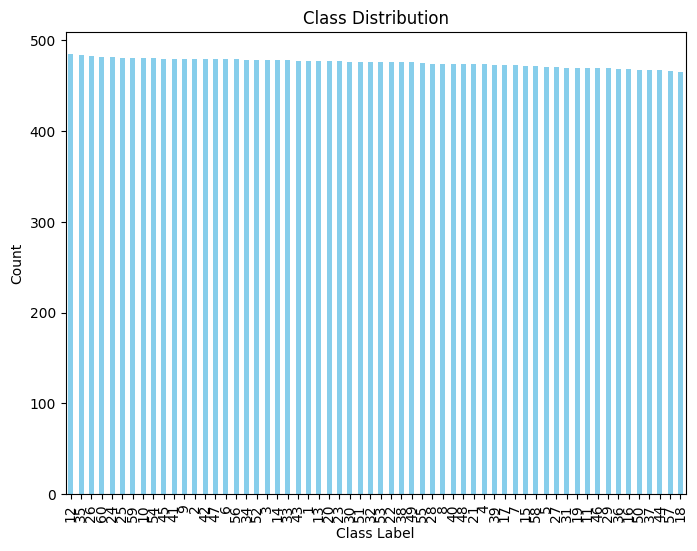

In [23]:
class_counts = train_label_1.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')


plt.show()

Choosing a model between SVC and Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}


best_model = None
best_accuracy = 0.0


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

for name, clf in classifiers.items():
    total_accuracy = 0.0

    for train_index, test_index in skf.split(train_features, train_label_1):
        X_train, X_test = train_features.iloc[train_index], train_features.iloc[test_index]
        y_train, y_test = train_label_1[train_index], train_label_1[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

    average_accuracy = total_accuracy / n_splits
    print(f"{name} - Average Accuracy: {average_accuracy}")


    if average_accuracy > best_accuracy:
        best_model = clf
        best_accuracy = average_accuracy

print(f"Best Model: {type(best_model)._name_}")

1. Random Forest - Average Accuracy: 0.861711079943899
2. SVM - Average Accuracy: 0.9337307152875175

PCA Decomposition

In [24]:
from sklearn.decomposition import PCA

def performPca(train_input, valid_input,test_input, n_components):
    pca = PCA(n_components=n_components , svd_solver='full')
    train_reduced = pca.fit_transform(train_input)
    valid_reduced = pca.transform(valid_input)
    test_reduced = pca.transform(test_input)
    train_reduced_df = pd.DataFrame(train_reduced, columns=[f"new_feature_{i+1}" for i in range(train_reduced.shape[1])])
    valid_reduced_df = pd.DataFrame(valid_reduced, columns=[f"new_feature_{i+1}" for i in range(valid_reduced.shape[1])])
    test_reduced_df = pd.DataFrame(test_reduced, columns=[f"new_feature_{i+1}" for i in range(test_reduced.shape[1])])


    return train_reduced_df, valid_reduced_df,test_reduced_df

In [25]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
scaled_train_features = transformer.fit_transform(train_features)
scaled_valid_features = transformer.fit_transform(valid_features)
scaled_test_features = transformer.fit_transform(test_features)

In [36]:
train_reduced_df, valid_reduced_df,test_reduced_df = performPca(scaled_train_features, scaled_valid_features, scaled_test_features, 'mle')

In [39]:
train_reduced_df

,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,new_feature_8,new_feature_9,new_feature_10,...,new_feature_758,new_feature_759,new_feature_760,new_feature_761,new_feature_762,new_feature_763,new_feature_764,new_feature_765,new_feature_766,new_feature_767
0,-5.886525,8.248412,3.008814,-1.063332,-10.140260,0.696448,3.598614,-7.177490,-0.702447,-4.894647,...,0.000741,0.188280,0.112387,0.100403,0.123076,-0.074158,-0.031099,0.027507,0.049062,-0.048093
1,-2.070712,8.675923,-4.368698,-0.112880,4.500854,1.316295,-3.941040,6.383735,-3.946805,-1.776208,...,0.159755,-0.032024,0.082067,-0.035837,0.042266,-0.040351,0.146570,0.101040,-0.066873,0.066434
2,19.608607,2.997858,-3.642239,-1.140787,0.561519,-2.085848,-1.395957,-1.535259,-2.766389,-1.332554,...,0.018707,0.025684,-0.026816,0.037388,-0.023521,-0.112032,0.004577,0.051932,0.018469,-0.041612
3,-3.245142,-0.660877,5.151833,0.727009,9.812837,1.157402,-1.259262,-1.155995,8.155777,-4.289239,...,0.057816,0.195664,0.268663,-0.039199,-0.158107,0.042924,-0.047504,-0.110772,0.214099,0.176687
4,-6.398425,6.868054,-12.195348,0.735330,1.100059,1.527326,4.080399,-3.480080,0.548702,0.977171,...,-0.035195,-0.001878,0.107585,0.109879,0.070578,-0.075910,-0.021154,-0.037058,-0.099031,0.011836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,46.069329,1.644546,2.980754,16.498429,-2.735126,20.390934,12.526169,3.441241,7.697603,1.614482,...,-0.008380,0.013750,0.223289,-0.038962,-0.019220,-0.039602,-0.028577,-0.024845,0.076859,0.079413
28516,1.756833,-2.162772,-3.680166,-8.099668,0.455004,0.728570,-2.670411,-0.114564,-1.320865,3.915469,...,-0.020824,0.010080,0.049489,-0.128108,0.010907,-0.055868,-0.048742,0.087250,-0.037056,-0.025273
28517,4.880491,-1.852696,2.360511,-1.774371,7.088854,6.536966,-0.772533,-2.758259,-6.571075,-1.928740,...,0.021247,0.013890,0.086862,-0.049683,-0.026434,-0.042015,-0.011974,-0.005172,-0.041687,0.002971
28518,-5.117150,4.464898,0.991901,-0.887991,-7.734172,1.335969,0.986382,-6.488961,-1.598297,-0.469749,...,-0.135878,0.072962,-0.111305,-0.131080,-0.055816,0.046375,-0.016462,-0.036164,-0.014481,0.028176


In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_reduced_df, train_label_1)
y_pred = model.predict(valid_reduced_df)
accuracy = accuracy_score(valid_label_1, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9466666666666667


In [40]:
# 0.99  --- > 0.9453333333333334
# mle    ----> 0.9466666
# 70     ----> 0.905333333
# 200     ----> 0.941333
# 600      ----> 0.9453333333333334
test_pred = model.predict(test_reduced_df)

In [41]:
#Write to file
test_pred_df = pd.DataFrame(test_pred, columns=['label_1'])
test_pred_df.to_csv('predictions/label_1.csv', index=False)

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' , 'linear', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_reduced_df, train_label_1)

In [42]:
from sklearn.svm import SVC

fin_model = SVC(C= 0.1, gamma = 1, kernel = 'linear')
fin_model.fit(train_reduced_df, train_label_1)
fin_y_pred = fin_model.predict(valid_reduced_df)
accuracy = accuracy_score(valid_label_1, fin_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9546666666666667


In [43]:
fin_test_pred = fin_model.predict(test_reduced_df)

In [44]:
#Write to file
fin_test_pred_df = pd.DataFrame(fin_test_pred, columns=['label_1'])
fin_test_pred_df.to_csv('predictions/label_1_1.csv', index=False)